
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [28]:
df=pd.read_excel(r'C:\Users\Dishika\AppData\Local\Microsoft\Windows\INetCache\IE\BU1UAG1M\NIke revenue[1].xlsx')

In [29]:
df.head()

,NIKE Quarterly Revenue,(Millions of US $)
0,2023-05-31,"$12,825"
1,2023-02-28,"$12,390"
2,2022-11-30,"$13,315"
3,2022-08-31,"$12,687"
4,2022-05-31,"$12,234"


In [30]:
df.tail()

,NIKE Quarterly Revenue,(Millions of US $)
53,2010-02-28,"$4,733"
54,2009-11-30,"$4,405"
55,2009-08-31,"$4,799"
56,2009-05-31,"$4,713"
57,2009-02-28,"$4,441"


In [31]:
## Cleaning up the data
df.columns=["Date","Revenues"]
df.head()

,Date,Revenues
0,2023-05-31,"$12,825"
1,2023-02-28,"$12,390"
2,2022-11-30,"$13,315"
3,2022-08-31,"$12,687"
4,2022-05-31,"$12,234"


In [32]:
df.tail()

,Date,Revenues
53,2010-02-28,"$4,733"
54,2009-11-30,"$4,405"
55,2009-08-31,"$4,799"
56,2009-05-31,"$4,713"
57,2009-02-28,"$4,441"


In [33]:
df

,Date,Revenues
0,2023-05-31,"$12,825"
1,2023-02-28,"$12,390"
2,2022-11-30,"$13,315"
3,2022-08-31,"$12,687"
4,2022-05-31,"$12,234"
5,2022-02-28,"$10,871"
6,2021-11-30,"$11,357"
7,2021-08-31,"$12,248"
8,2021-05-31,"$12,344"
9,2021-02-28,"$10,357"


In [34]:
df.set_index('Date',inplace=True)

In [35]:
df.head()

,Revenues
Date,
2023-05-31,"$12,825"
2023-02-28,"$12,390"
2022-11-30,"$13,315"
2022-08-31,"$12,687"
2022-05-31,"$12,234"


In [36]:
df.tail()

,Revenues
Date,
2010-02-28,"$4,733"
2009-11-30,"$4,405"
2009-08-31,"$4,799"
2009-05-31,"$4,713"
2009-02-28,"$4,441"


In [37]:
df.describe()

,Revenues
count,58
unique,58
top,"$12,825"
freq,1


In [38]:
columns_to_clean = ['Revenues']  # Replace with your actual column names

for column in columns_to_clean:
    df[column] = df[column].str.replace('$', '').str.replace(',', '')

# Now the specified columns have dollar signs and commas removed
print(df.head())

           Revenues
Date               
2023-05-31    12825
2023-02-28    12390
2022-11-30    13315
2022-08-31    12687
2022-05-31    12234


C:\Users\Dishika\AppData\Local\Temp\ipykernel_13144\416043161.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace('$', '').str.replace(',', '')


In [40]:
df['Revenues'] = df['Revenues'].str.replace('$', '').str.replace(',', '').astype(float)


C:\Users\Dishika\AppData\Local\Temp\ipykernel_13144\3900067336.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Revenues'] = df['Revenues'].str.replace('$', '').str.replace(',', '').astype(float)


## Step 2: Visualize the Data

<Axes: xlabel='Date'>

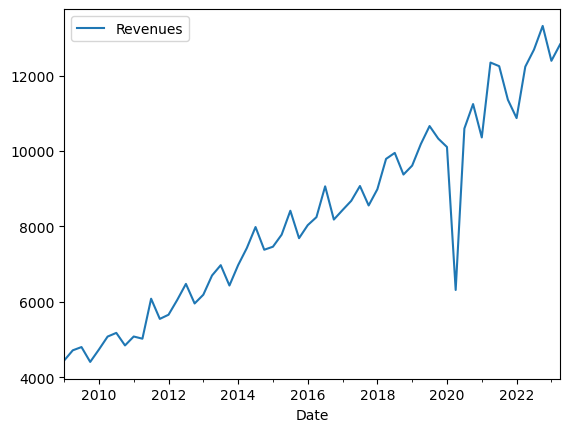

In [42]:
df.plot()

In [43]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [44]:
test_result=adfuller(df['Revenues'])

In [88]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Revenues):
    result=adfuller(Revenues)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [89]:
adfuller_test(df['Revenues'])

ADF Test Statistic : -1.3554681015707855
p-value : 0.6034294497074794
#Lags Used : 2
Number of Observations Used : 55
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [90]:
df['Revenues First Difference'] = df['Revenues'] - df['Revenues'].shift(1)

In [91]:
df['Revenues'].shift(1)

Date
2023-05-31        NaN
2023-02-28    12825.0
2022-11-30    12390.0
2022-08-31    13315.0
2022-05-31    12687.0
2022-02-28    12234.0
2021-11-30    10871.0
2021-08-31    11357.0
2021-05-31    12248.0
2021-02-28    12344.0
2020-11-30    10357.0
2020-08-31    11243.0
2020-05-31    10594.0
2020-02-29     6313.0
2019-11-30    10104.0
2019-08-31    10326.0
2019-05-31    10660.0
2019-02-28    10184.0
2018-11-30     9611.0
2018-08-31     9374.0
2018-05-31     9948.0
2018-02-28     9789.0
2017-11-30     8984.0
2017-08-31     8554.0
2017-05-31     9070.0
2017-02-28     8677.0
2016-11-30     8432.0
2016-08-31     8180.0
2016-05-31     9061.0
2016-02-29     8244.0
2015-11-30     8032.0
2015-08-31     7686.0
2015-05-31     8414.0
2015-02-28     7779.0
2014-11-30     7460.0
2014-08-31     7380.0
2014-05-31     7982.0
2014-02-28     7425.0
2013-11-30     6972.0
2013-08-31     6431.0
2013-05-31     6971.0
2013-02-28     6697.0
2012-11-30     6187.0
2012-08-31     5955.0
2012-05-31     6474.0
2012-

In [92]:
df['Seasonal First Difference']=df['Revenues']-df['Revenues'].shift(12)

In [93]:
df.head(14)

,Revenues,Revenues First Difference,Seasonal First Difference,forecast
Date,,,,
2023-05-31,12825.0,NaN,NaN,NaN
2023-02-28,12390.0,-435.0,NaN,NaN
2022-11-30,13315.0,925.0,NaN,NaN
2022-08-31,12687.0,-628.0,NaN,NaN
2022-05-31,12234.0,-453.0,NaN,NaN
2022-02-28,10871.0,-1363.0,NaN,NaN
2021-11-30,11357.0,486.0,NaN,NaN
2021-08-31,12248.0,891.0,NaN,NaN
2021-05-31,12344.0,96.0,NaN,NaN


In [94]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.59726166741414
p-value : 0.005813595105430462
#Lags Used : 3
Number of Observations Used : 42
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

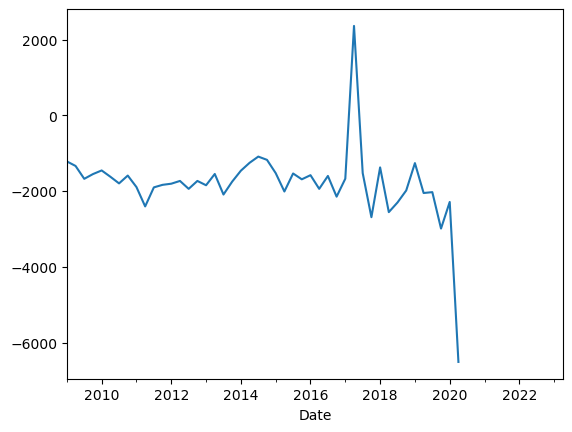

In [95]:
df['Seasonal First Difference'].plot()

In [97]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


## Auto Regressive Model
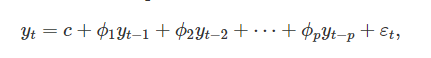

In [100]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['Revenues'])
plt.show()

ModuleNotFoundError: No module named 'pandas.tools'

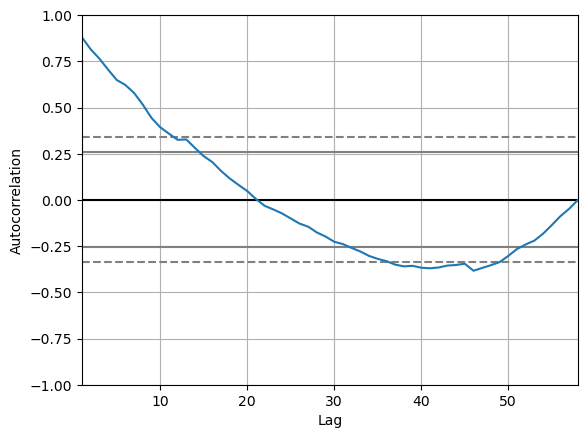

In [99]:
pd.plotting.autocorrelation_plot(df['Revenues'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
   

# p,d,q
    p = AR model lags
    d = differencing (How many Seasonal differencing I did?)
    q = MA lags

In [101]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\Dishika\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 40 must be < 22.

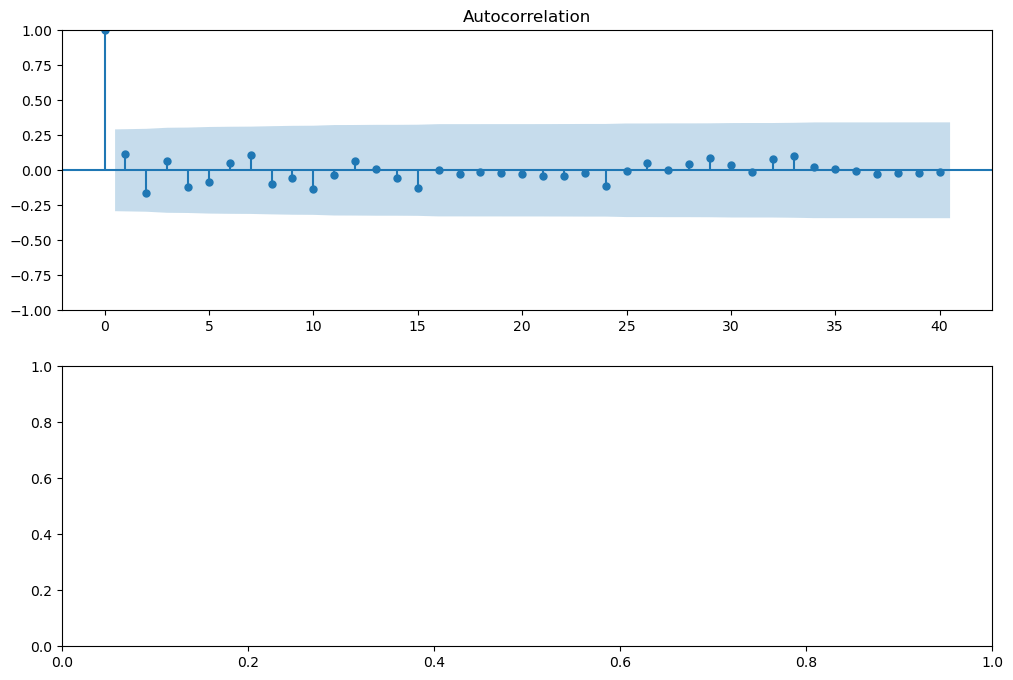

In [102]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [103]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [105]:
pip install pandas matplotlib statsmodels


Note: you may need to restart the kernel to use updated packages.


In [106]:
model=ARIMA(df['Revenues'],order=(1,1,1))
model_fit=model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [177]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Wed, 18 Mar 2020   AIC                           1910.251
Time:                        13:40:32   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7838     12.405      1.837      0.069      -1.530      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

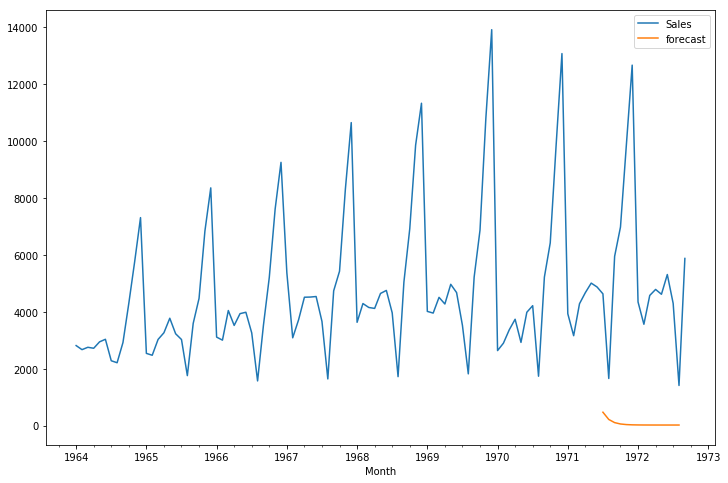

In [178]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [76]:
import statsmodels.api as sm

In [77]:
model=sm.tsa.statespace.SARIMAX(df['Revenues'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Dishika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1Q-NOV will be used.
  self._init_dates(dates, freq)
C:\Users\Dishika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dishika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1Q-NOV will be used.
  self._init_dates(dates, freq)
C:\Users\Dishika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dishika\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-inve

C:\Users\Dishika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dishika\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: xlabel='Date'>

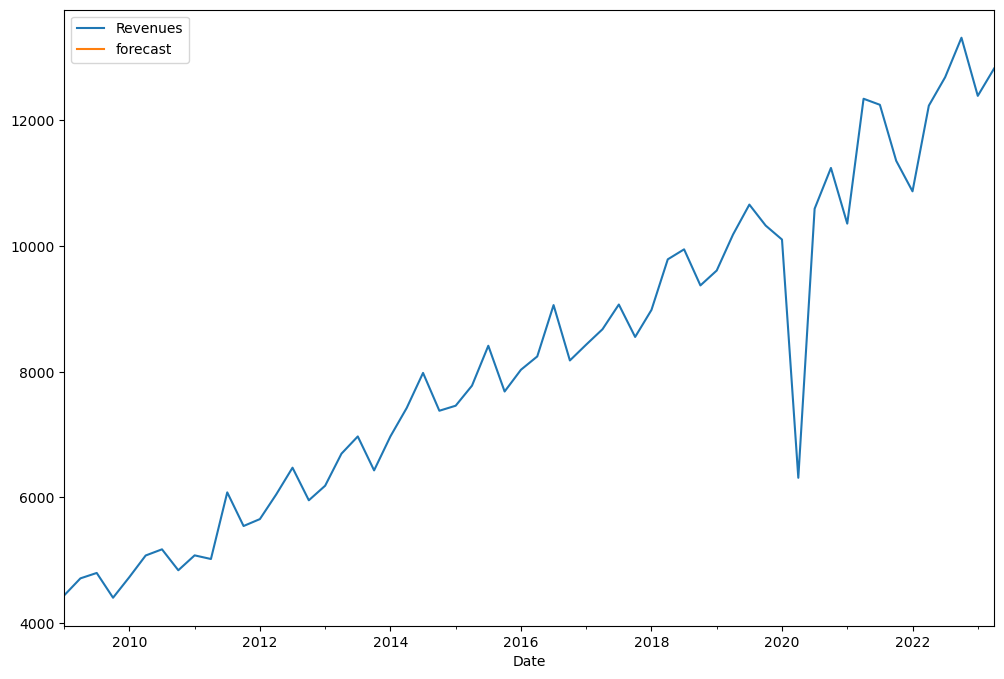

In [78]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Revenues','forecast']].plot(figsize=(12,8))

In [79]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [80]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [81]:
future_datest_df.tail()

,Revenues,Revenues First Difference,Seasonal First Difference,forecast
2010-09-28,NaN,NaN,NaN,NaN
2010-10-28,NaN,NaN,NaN,NaN
2010-11-28,NaN,NaN,NaN,NaN
2010-12-28,NaN,NaN,NaN,NaN
2011-01-28,NaN,NaN,NaN,NaN


In [82]:
future_df=pd.concat([df,future_datest_df])

C:\Users\Dishika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dishika\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

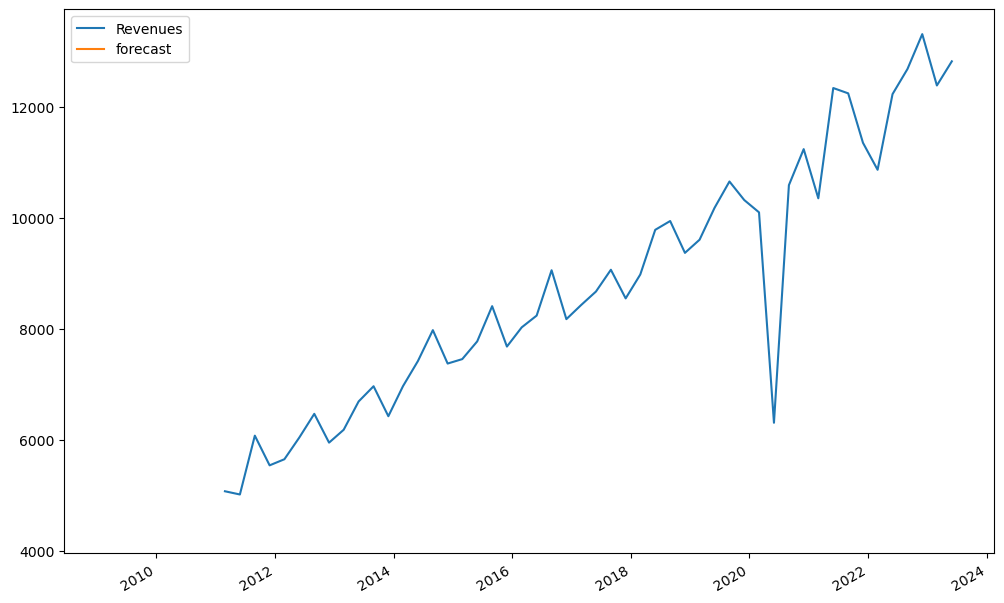

In [83]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Revenues', 'forecast']].plot(figsize=(12, 8)) 